### Anomaly Detection using supervised and unsupervised learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from faker import Faker
fake = Faker()
Faker.seed(4321)
names_list = []
for _ in range(100):
    names_list.append(fake.name())

In [3]:
np.random.seed(7)
salaries = []
for _ in range(100):
    salary = np.random.randint(1000, 2500)
    salaries.append(salary)

In [4]:
salary_df = pd.DataFrame({'Person':names_list, 'Salary (in USD)':salaries})
print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [5]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


<AxesSubplot:>

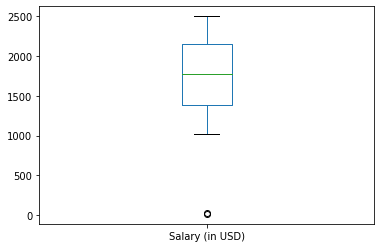

In [6]:
salary_df['Salary (in USD)'].plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

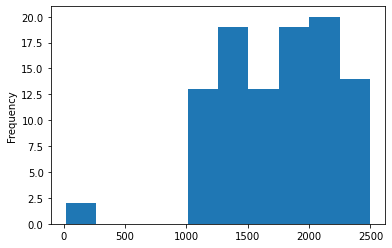

In [7]:
salary_df['Salary (in USD)'].plot(kind = 'hist')

In [8]:
print('Minimum salary ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary ' + str(salary_df['Salary (in USD)'].max()))

Minimum salary 17
Maximum salary 2498


Clustering based approach for anomaly detection

In [9]:
salary_raw = salary_df['Salary (in USD)'].values
print(salary_raw)

[1175 2220 1537 1502 1211 1919 2372 2209 2422 1535 1345 1366 1554 1730
 1904 2191   23 2456 1391 1940 2099 1823 1250 2030 2468 2068 2349 2176
 1183 1949 2136 1763 2213 1290 1312 1201 2486 1550 1772 1494 2161 2219
 2096 1944 1257 1400 2398 2373 1940 1604 1764 1279 1745 1803 2472 2341
 2415 2175 1092 1759 2248 1356 1931 1481 1579   17 1481 2043 1923 1787
 1033 2147 2310 1741 1989 2439 2154 2107 1402 1021 1203 1047 1784 1524
 1349 1107 1393 1844 1622 1654 1636 1276 1309 1827 1035 1260 1456 2498
 2007 2239]


In [10]:
salary_raw = salary_raw.reshape(-1, 1)
print(salary_raw)

[[1175]
 [2220]
 [1537]
 [1502]
 [1211]
 [1919]
 [2372]
 [2209]
 [2422]
 [1535]
 [1345]
 [1366]
 [1554]
 [1730]
 [1904]
 [2191]
 [  23]
 [2456]
 [1391]
 [1940]
 [2099]
 [1823]
 [1250]
 [2030]
 [2468]
 [2068]
 [2349]
 [2176]
 [1183]
 [1949]
 [2136]
 [1763]
 [2213]
 [1290]
 [1312]
 [1201]
 [2486]
 [1550]
 [1772]
 [1494]
 [2161]
 [2219]
 [2096]
 [1944]
 [1257]
 [1400]
 [2398]
 [2373]
 [1940]
 [1604]
 [1764]
 [1279]
 [1745]
 [1803]
 [2472]
 [2341]
 [2415]
 [2175]
 [1092]
 [1759]
 [2248]
 [1356]
 [1931]
 [1481]
 [1579]
 [  17]
 [1481]
 [2043]
 [1923]
 [1787]
 [1033]
 [2147]
 [2310]
 [1741]
 [1989]
 [2439]
 [2154]
 [2107]
 [1402]
 [1021]
 [1203]
 [1047]
 [1784]
 [1524]
 [1349]
 [1107]
 [1393]
 [1844]
 [1622]
 [1654]
 [1636]
 [1276]
 [1309]
 [1827]
 [1035]
 [1260]
 [1456]
 [2498]
 [2007]
 [2239]]


In [11]:
salary_raw = salary_raw.astype('float64')
print(salary_raw)

[[1175.]
 [2220.]
 [1537.]
 [1502.]
 [1211.]
 [1919.]
 [2372.]
 [2209.]
 [2422.]
 [1535.]
 [1345.]
 [1366.]
 [1554.]
 [1730.]
 [1904.]
 [2191.]
 [  23.]
 [2456.]
 [1391.]
 [1940.]
 [2099.]
 [1823.]
 [1250.]
 [2030.]
 [2468.]
 [2068.]
 [2349.]
 [2176.]
 [1183.]
 [1949.]
 [2136.]
 [1763.]
 [2213.]
 [1290.]
 [1312.]
 [1201.]
 [2486.]
 [1550.]
 [1772.]
 [1494.]
 [2161.]
 [2219.]
 [2096.]
 [1944.]
 [1257.]
 [1400.]
 [2398.]
 [2373.]
 [1940.]
 [1604.]
 [1764.]
 [1279.]
 [1745.]
 [1803.]
 [2472.]
 [2341.]
 [2415.]
 [2175.]
 [1092.]
 [1759.]
 [2248.]
 [1356.]
 [1931.]
 [1481.]
 [1579.]
 [  17.]
 [1481.]
 [2043.]
 [1923.]
 [1787.]
 [1033.]
 [2147.]
 [2310.]
 [1741.]
 [1989.]
 [2439.]
 [2154.]
 [2107.]
 [1402.]
 [1021.]
 [1203.]
 [1047.]
 [1784.]
 [1524.]
 [1349.]
 [1107.]
 [1393.]
 [1844.]
 [1622.]
 [1654.]
 [1636.]
 [1276.]
 [1309.]
 [1827.]
 [1035.]
 [1260.]
 [1456.]
 [2498.]
 [2007.]
 [2239.]]


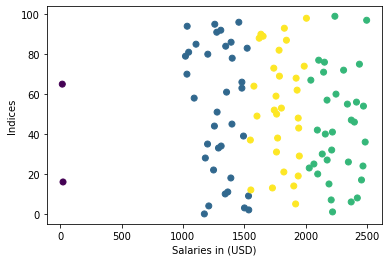

In [12]:
from scipy.cluster.vq import vq
from scipy.cluster.vq import kmeans
from sklearn.cluster import KMeans
centroids, avg_distance = kmeans(salary_raw, 4)

# Get the groups (clusters) and distances
groups, cdist = vq(salary_raw, centroids)
plt.scatter(salary_raw, np.arange(0, 100), c = groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

In [13]:
# First assign all the instances to 
salary_df['class'] = 0

# Manually edit the labels for the anomalies
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1

# Veirfy 
print(salary_df.loc[16])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
class                                  1
Name: 16, dtype: object


In [14]:
# Importing KNN module from PyOD
from pyod.models.knn import KNN

In [15]:
# Segregate the salary values and the class labels 
X = salary_df['Salary (in USD)'].values.reshape(-1,1)
y = salary_df['class'].values

In [16]:
#Train KNN detector
clf = KNN(contamination = 0.02, n_neighbors = 5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [17]:
# Get the prediction labels of the training data
y_train_pred = clf.labels_ 
    
# Outlier scores
y_train_scores = clf.decision_scores_

In [18]:
# Import the utility function for model evaluation
from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print('KNN', y, y_train_scores)

KNN ROC:1.0, precision @ rank n:1.0


In [19]:
# A salary of $37 (an anomaly right?)
X_test = np.array([[37.]])

# Check what the model predicts on the given test data point
clf.predict(X_test)

array([1])

In [20]:
# A salary of $1256
X_test_abnormal = np.array([[1256.]])

# Predict
clf.predict(X_test_abnormal)

array([0])

In [21]:
from sklearn import datasets
from sklearn.cluster import KMeans
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [22]:
km  = KMeans(n_clusters = 3, random_state = 42)
km.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553
